In [37]:
#importing all the necessary packages

import re
import string
import hashlib
import nltk
import glob
import errno
import csv
from os import listdir
import os
from os.path import isfile
from os.path import join
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords


from sklearn import metrics
from nltk.stem.porter import PorterStemmer

In [38]:
#this hash should serve to represent the content of the files in the data directory
# use the filename as the hash key and the value will be the text of the file
# thus you would be able to retrieve an individual documents text like: article_hash["article_1"]

article_hash = {}
directory = "/Users/varsha/Python Workspace/homework_2/data"


In [39]:
# here we will get a list of the filenames of things contained in the data directory

files = [f for f in listdir(directory) if isfile(join(directory, f))]

for file in files:
    #file = pathlib.Path( "/Users/varsha/Python Workspace/homework_2/data")
    #print(file)
    fileop=open(directory+"/"+file,"r")
    text = fileop.read()
    article_hash[file]  = text
    print("-----------------------------------")
    print("file;" , file)
    print(article_hash[file])
    

-----------------------------------
file; article_10
D.C. Metro Derailment: Excessive Heat To Blame
2 minutes

Why did three Metro cars derail during rush hour on Friday? Excessive heat.

On Saturday, the tenth day in a row with temperatures over 95 degrees in the D.C. area, the Washington Metropolitan Area Transit Authority released a statement saying that investigators think this summer’s heatwave likely caused a “heat kink” in the tracks, which in turn caused the derailment:

    Investigators have determined that a misalignment of the rails, known as a “heat kink,” was a probable cause of yesterday’s derailment near West Hyattsville Station. Three cars of an inbound Green Line train derailed at approximately 4:45 p.m. as the train entered a tunnel from an outdoor section of track. There were no injuries.

    Heat kinks are short sections of misaligned track caused by the expansion of metal rails in extremely high temperatures and prolonged exposure to direct sunlight. When the exp

In [40]:
print(article_hash['article_10'])

D.C. Metro Derailment: Excessive Heat To Blame
2 minutes

Why did three Metro cars derail during rush hour on Friday? Excessive heat.

On Saturday, the tenth day in a row with temperatures over 95 degrees in the D.C. area, the Washington Metropolitan Area Transit Authority released a statement saying that investigators think this summer’s heatwave likely caused a “heat kink” in the tracks, which in turn caused the derailment:

    Investigators have determined that a misalignment of the rails, known as a “heat kink,” was a probable cause of yesterday’s derailment near West Hyattsville Station. Three cars of an inbound Green Line train derailed at approximately 4:45 p.m. as the train entered a tunnel from an outdoor section of track. There were no injuries.

    Heat kinks are short sections of misaligned track caused by the expansion of metal rails in extremely high temperatures and prolonged exposure to direct sunlight. When the expanding rail cannot be constrained by cross-ties and b

In [41]:
processed_article_hash ={}  

#Performing various pre processing --stemming, tokenization and removal of stopwords

for key in article_hash.keys():    
     text_of_article = article_hash[key]
     stemmer = PorterStemmer()

     def stem_tokens(tokens, stemmer):
          stemmed = []
          for item in tokens:
             stemmed.append(stemmer.stem(item))
          return stemmed

     def tokenize(text):
          tokens = nltk.word_tokenize(text)
          tokens = [word for word in tokens if word not in stopwords.words('english')]
          stems = stem_tokens(tokens, stemmer)
          return ' '.join(stems)

     intab = string.punctuation
     outtab = "                                "
     trantab = str.maketrans(intab, outtab)
     tokenize(text_of_article)
     print("-----------------------------")
     print(key)
     print(tokenize(text_of_article))     
    
     processed_article_hash[key] = tokenize(text_of_article)
     

-----------------------------
article_10
d.c. metro derail : excess heat To blame 2 minut whi three metro car derail rush hour friday ? excess heat . On saturday , tenth day row temperatur 95 degre d.c. area , washington metropolitan area transit author releas statement say investig think summer ’ heatwav like caus “ heat kink ” track , turn caus derail : investig determin misalign rail , known “ heat kink , ” probabl caus yesterday ’ derail near west hyattsvil station . three car inbound green line train derail approxim 4:45 p.m. train enter tunnel outdoor section track . there injuri . heat kink short section misalign track caus expans metal rail extrem high temperatur prolong exposur direct sunlight . when expand rail constrain cross-ti ballast , rail may expand outward normal track align . wmata spokesperson carolin luka told the huffington post speed restrict 35 mile per hour place train use track expos sun , restrict last “ least durat weekend. ” luka also said wmata “ increas tr

-----------------------------
article_4
cardin win world seri - the new york time david waldstein 7-9 minut photo the st. loui cardin celebr defeat texa ranger win world seri . credit matt slocum/associ press st. loui — when st. loui cardin appar final strike season , ninth 10th inning game 6 thursday night , manag toni La russa told player dugout forget thank fan support amid look like crush season-end loss . after defi elimin nearli two month , appear cardin ’ unlik playoff run final come conclus , even La russa prepar conced defeat . but less 24 hour later , fan thank cardin shower applaus cheer . In one wildest , improb championship run memori , cardin beat texa ranger , 6-2 , game 7 world seri friday night win stori club ’ 11th championship . ” ha ever entertain , better team st. loui championship ? ” said veteran outfield lanc berkman , first world seri 13 season basebal . “ I ’ ’ 60 ’ 80 championship . but good , team is. ” continu read main stori It team 10 1/2 game playoff spo

-----------------------------
article_2
tokyo ( cnn ) -- the worst may pass seriou nuclear accid sinc chernobyl , clean 's final like take decad cost japan untold fortun . A six- nine-month horizon wind crisi , laid plant owner tokyo electr power week , begin . near end timelin , japan 's govern say decid -- whether -- nearli 80,000 peopl told flee home earli day disast return . friday mark six week sinc march 11 magnitude-9.0 earthquak subsequ tsunami trigger crisi . some alreadi spent six week emerg hous , like tomioka funer director kazuhiro shirato , say n't expect return home . `` I 've told tepco sinc I small nuclear power plant safe , I never imagin would happen , '' shirato told cnn . `` I hope whole town move anoth place rebuild . '' mani displac disast spent month live govern shelter -- sometim gym -- run low money . tokyo electr promis make payment compens 1 million yen ( $ 12,000 ) per household , intent send check late april . anoth 66,000 told prepar evacu town radiat rea

-----------------------------
article_9
ohio state univers hire urban meyer footbal coach monday , give one richest contract ever colleg sport — latest indic big busi colleg footbal undet nation ’ broader econom woe concern promin sport campu . the contract includ $ 4 million base salari , bonus — everyth player ’ graduat rate play nation championship , $ 700,000 annual — lump payment 2014 , 2016 2018 . the deal worth three time $ 1.32 million univers ’ presid , E. gordon gee , made 2010 , accord the chronicl higher educ . mr. meyer ohio state reach lucr deal amid chaotic year colleg athlet . the univers miami rock report donor lavish footbal player gift year ; longtim assist penn state footbal syracus men ’ basketbal team face alleg sexual abus young boy . sever promin program investig colleg athlet ’ govern bodi , n.c.a.a. , myriad violat . even buckey await potenti n.c.a.a . sanction player trade memorabilia cash tattoo , led ouster jim tressel coach six month ago . still , colleg f

-----------------------------
article_1
Q & A : Is fukushima bad chernobyl ? By thair shaikh , cnn 8-10 minut the sever rate fukushima daiichi nuclear power plant disast upgrad level 7 . the sever rate fukushima daiichi nuclear power plant disast upgrad level 7 . stori highlight japan rais sever level fukushima nuclear crisi maximum level 7 decis come review amount radiat releas plant amount radiat releas tenth releas chernobyl , say offici ( cnn ) -- japan rais sever level nuclear crisi maximum level seven tuesday , put fukushima daiichi power plant disast par chernobyl accid 1986 . the decis rais crisi level five seven came review amount radiat releas month sinc plant sever damag earthquak subsequ tsunami , say japan 's offici nuclear watchdog , nuclear industri safeti agenc ( nisa ) . level seven intern nuclear event scale ( ine ) incid involv major releas radiat widespread health environment effect , accord intern atom energi agenc ( iaea ) . fukushima remain danger state -- northe

-----------------------------
article_8
tornado sweep across alabama , tennesse , ohio indiana the christian scienc monitor 6-7 minut athen , ga. At least dozen tornado report cut nation 's midsect . appar tornado destroy hous , sent peopl hospit tore roof maximum secur prison northern alabama bad weather threaten twister across region friday , two day storm kill 13 peopl midwest south . there report clark counti indiana hit larg tornado , high school henryvil , ind. , struck . the school close . there report yet scale damag injuri clark counti . the nation weather servic issu sever weather tornado warn georgia southern ohio across wide swath forecast said strong storm sweep across nation 's mid-sect . thousand schoolchildren sever state sent home precaut . meanwhil , resid part illinoi hit hard twister earlier week salvag could splinter home . recommend : how surviv tornado tornado warn current counti northeast georgia , south carolina , part indiana ohio . the weather servic say torn

In [42]:
vectors_tf = {}
vectors_cv ={}
#count vectorizing and getting the term frequency and inverse document requency
for key in processed_article_hash.keys():
     print("-----------------------------")
     print("key value is :",key ) 
     print(processed_article_hash[key])
     text = processed_article_hash[key]
     text=[text]
     count_vect = CountVectorizer()
     processed_article_hash_counts = count_vect.fit_transform(text)        
     print(processed_article_hash_counts )   
     vectors_cv[key]=processed_article_hash_counts
     tfidf_transformer = TfidfTransformer()
     processed_article_hash_tfidf = tfidf_transformer.fit_transform(processed_article_hash_counts)
     print('key value:',key)
     print( processed_article_hash_tfidf)
     print("--------")
     vectors_tf[key] = (processed_article_hash_tfidf.todense())
     print(vectors_tf[key])
     
       



-----------------------------
key value is : article_10
d.c. metro derail : excess heat To blame 2 minut whi three metro car derail rush hour friday ? excess heat . On saturday , tenth day row temperatur 95 degre d.c. area , washington metropolitan area transit author releas statement say investig think summer ’ heatwav like caus “ heat kink ” track , turn caus derail : investig determin misalign rail , known “ heat kink , ” probabl caus yesterday ’ derail near west hyattsvil station . three car inbound green line train derail approxim 4:45 p.m. train enter tunnel outdoor section track . there injuri . heat kink short section misalign track caus expans metal rail extrem high temperatur prolong exposur direct sunlight . when expand rail constrain cross-ti ballast , rail may expand outward normal track align . wmata spokesperson carolin luka told the huffington post speed restrict 35 mile per hour place train use track expos sun , restrict last “ least durat weekend. ” luka also said wma

In [43]:
def jaccard_similarity(a, b):
    intersection = float(len(set(a) & set(b)))
    union = float(len(set(a) | set(b)))
    return (intersection/union)




In [44]:
def jaccard_distance(a, b):
    intersection = float(len(set(a) & set(b)))
    union = float(len(set(a) | set(b)))
    return 1 - (intersection/union)



In [45]:

print("--------------------Jaccardian Distance--------------------")                
       
for file_x in processed_article_hash.keys():
    for file_y in processed_article_hash.keys():
        dist =jaccard_distance( processed_article_hash[file_x],processed_article_hash[file_y])
        if len(processed_article_hash) < 12:
            print("%.2f" % dist ,"", end='')
            with open('sparse_matrix_distance.txt','a') as f:
                 print("%.2f"% dist,"",end = '',sep='',file=f)
        else:
            print("%.2f" % dist ,"",end ='')
            with open('sparse_matrix_distance.txt','a') as f:
                 print("%.2f" % dist,"",end='',sep='',file=f)
    print("\n")
    with open('sparse_matrix_distance.txt','a') as f:
                 print("%.2f" % dist ,"",end='\n',sep='',file=f)
                 

--------------------Jaccardian Distance--------------------
0.00 0.34 0.41 0.29 0.34 0.36 0.25 0.30 0.29 0.42 0.34 0.36 

0.34 0.00 0.35 0.45 0.42 0.35 0.47 0.45 0.39 0.38 0.47 0.28 

0.41 0.35 0.00 0.35 0.38 0.21 0.35 0.33 0.35 0.26 0.32 0.27 

0.29 0.45 0.35 0.00 0.23 0.24 0.17 0.19 0.21 0.31 0.17 0.33 

0.34 0.42 0.38 0.23 0.00 0.32 0.29 0.27 0.27 0.36 0.14 0.35 

0.36 0.35 0.21 0.24 0.32 0.00 0.27 0.25 0.27 0.17 0.27 0.17 

0.25 0.47 0.35 0.17 0.29 0.27 0.00 0.19 0.18 0.36 0.20 0.35 

0.30 0.45 0.33 0.19 0.27 0.25 0.19 0.00 0.23 0.37 0.25 0.36 

0.29 0.39 0.35 0.21 0.27 0.27 0.18 0.23 0.00 0.31 0.24 0.30 

0.42 0.38 0.26 0.31 0.36 0.17 0.36 0.37 0.31 0.00 0.31 0.23 

0.34 0.47 0.32 0.17 0.14 0.27 0.20 0.25 0.24 0.31 0.00 0.32 

0.36 0.28 0.27 0.33 0.35 0.17 0.35 0.36 0.30 0.23 0.32 0.00 



In [46]:
print("--------------------Jaccardian Similarity-------------------")
for file_x in processed_article_hash.keys():
    for file_y in processed_article_hash.keys():
        dist =jaccard_similarity(processed_article_hash[file_x],processed_article_hash[file_y])
        if len(processed_article_hash) < 12:
            print("%.2f" % dist ,"", end='')
            with open('sparse_matrix_similarity.txt','a') as f:
                 print("%.2f"% dist,"",end = '',sep='',file=f)
        else:
            print("%.2f" % dist ,"",end ='')
            with open('sparse_matrix_similarity.txt','a') as f:
                 print("%.2f" % dist,"",end='',sep='',file=f)
    print("\n")
    with open('sparse_matrix_similarity.txt','a') as f:
                 print("%.2f" % dist ,"",end='\n',sep='',file=f)
                 

--------------------Jaccardian Similarity-------------------
1.00 0.66 0.59 0.71 0.66 0.64 0.75 0.70 0.71 0.58 0.66 0.64 

0.66 1.00 0.65 0.55 0.58 0.65 0.53 0.55 0.61 0.62 0.53 0.72 

0.59 0.65 1.00 0.65 0.62 0.79 0.65 0.67 0.65 0.74 0.68 0.73 

0.71 0.55 0.65 1.00 0.77 0.76 0.83 0.81 0.79 0.69 0.83 0.67 

0.66 0.58 0.62 0.77 1.00 0.68 0.71 0.73 0.73 0.64 0.86 0.65 

0.64 0.65 0.79 0.76 0.68 1.00 0.73 0.75 0.73 0.83 0.73 0.83 

0.75 0.53 0.65 0.83 0.71 0.73 1.00 0.81 0.82 0.64 0.80 0.65 

0.70 0.55 0.67 0.81 0.73 0.75 0.81 1.00 0.77 0.63 0.75 0.64 

0.71 0.61 0.65 0.79 0.73 0.73 0.82 0.77 1.00 0.69 0.76 0.70 

0.58 0.62 0.74 0.69 0.64 0.83 0.64 0.63 0.69 1.00 0.69 0.77 

0.66 0.53 0.68 0.83 0.86 0.73 0.80 0.75 0.76 0.69 1.00 0.68 

0.64 0.72 0.73 0.67 0.65 0.83 0.65 0.64 0.70 0.77 0.68 1.00 



In [47]:
import pandas as pd

df = pd.read_excel("/Users/varsha/Python Workspace/Nlpassignment/jaccardian.xlsx")


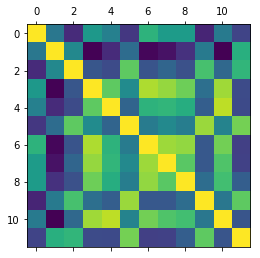

In [48]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.show()

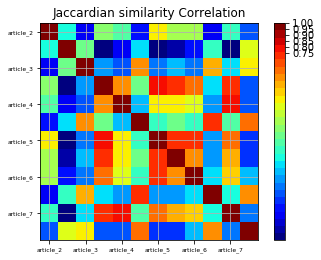

In [49]:
#Plotting the Jaccardian similarity correlation
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Jaccardian similarity Correlation')
    labels=['article_1','article_2','article_3','article_4','article_5','article_6','article_7','article_8','article_9','article_10','article_11','article_12']
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(df)

In [50]:
#Cosine similarity on vectors of different shape using tf-idf

import numpy as np
import numpy.linalg as LA

import math  
def cosine_similarity(a, b) :
    a, b = (a, b) if len(a) < len(b) else (b, a)
    b = b[:len(a)]
    return round(np.inner(a, b)/(LA.norm(a)*LA.norm(b)), 2)

def using_cx():
    for v in l:
       for y in l:
        cosine=cx(v,y)

In [51]:
print("-----------------Cosine Similarity--------------")
import numpy as np
for file_x in vectors_tf.keys():
    for file_y in vectors_tf.keys():
        A=np.squeeze(np.asarray(vectors_tf[file_x]))
        B=np.squeeze(np.asarray(vectors_tf[file_y]))
        dist =cosine_similarity(A,B)
        if len(vectors_tf) < 12:
            print("%.2f" % dist ,"", end='')
            with open('sparse_matrix1_cosine.txt','a') as f:
                 print("%.2f"% dist,"",end = '',sep='',file=f)
        else:
            print("%.2f" % dist ,"",end ='')
            with open('sparse_matrix1_cosine.txt','a') as f:
                 print("%.2f" % dist,"",end='',sep='',file=f)
    print("\n")
    with open('sparse_matrix1_cosine.txt','a') as f:
                 print("%.2f" % dist ,"",end='\n',sep='',file=f)
                 
                 


-----------------Cosine Similarity--------------
1.00 0.68 0.62 0.53 0.48 0.65 0.63 0.49 0.54 0.56 0.45 0.60 

0.68 1.00 0.71 0.57 0.45 0.69 0.58 0.49 0.54 0.51 0.52 0.58 

0.62 0.71 1.00 0.41 0.38 0.53 0.37 0.40 0.38 0.38 0.40 0.50 

0.53 0.57 0.41 1.00 0.36 0.54 0.40 0.38 0.44 0.39 0.40 0.46 

0.48 0.45 0.38 0.36 1.00 0.48 0.39 0.37 0.37 0.35 0.36 0.43 

0.65 0.69 0.53 0.54 0.48 1.00 0.51 0.49 0.55 0.54 0.53 0.50 

0.63 0.58 0.37 0.40 0.39 0.51 1.00 0.37 0.41 0.39 0.40 0.39 

0.49 0.49 0.40 0.38 0.37 0.49 0.37 1.00 0.39 0.33 0.37 0.36 

0.54 0.54 0.38 0.44 0.37 0.55 0.41 0.39 1.00 0.37 0.47 0.46 

0.56 0.51 0.38 0.39 0.35 0.54 0.39 0.33 0.37 1.00 0.38 0.40 

0.45 0.52 0.40 0.40 0.36 0.53 0.40 0.37 0.47 0.38 1.00 0.43 

0.60 0.58 0.50 0.46 0.43 0.50 0.39 0.36 0.46 0.40 0.43 1.00 



In [52]:
df1 = pd.read_excel("/Users/varsha/Python Workspace/Nlpassignment/cosine.xlsx")



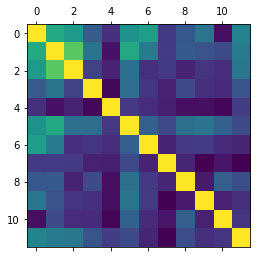

In [53]:
import matplotlib.pyplot as plt

plt.matshow(df1.corr())
plt.show()

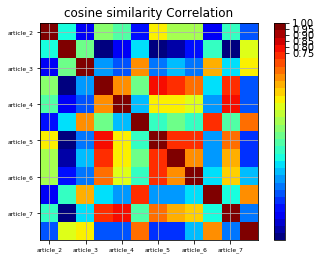

In [54]:
#plotting the cosine similarity correlation
def correlation_matrix(df1):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('cosine similarity Correlation')
    labels=['article_1','article_2','article_3','article_4','article_5','article_6','article_7','article_8','article_9','article_10','article_11','article_12']
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(df)

From perusing the documents, do you think the suggested ones are similar or not? Does tokenization, stemming, stop word removal or anything else improve your results?


Tokenization; stemming and stop words removal increases the cosine similarity percentage
Whereas the same process decreases the Jaccardian similarity percentage.



The preprocessing steps used in the code include
stemming, tokenization, stopwords removal, count vectorization and generating the term frequency and inverse document frequency.

Both the similarity metric have values in a similar range with ten percent differnce.